# **Drug Consumption Classification**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
dataset = pd.read_csv('data/drug_consumption.csv')
data1 = pd.read_csv('data/drug_consumption.csv')
clean_dataset = dataset.copy()

In [3]:
dataset.head(20)

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
5,6,2.59171,0.48246,-1.22751,0.24923,-0.31685,-0.67825,-0.30033,-1.55521,2.03972,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0
6,7,1.09449,-0.48246,1.16365,-0.57009,-0.31685,-0.46725,-1.09207,-0.45174,-0.30172,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0
7,8,0.49788,-0.48246,-1.73790,0.96082,-0.31685,-1.32828,1.93886,-0.84732,-0.30172,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0
8,9,0.49788,0.48246,-0.05921,0.24923,-0.31685,0.62967,2.57309,-0.97631,0.76096,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0
9,10,1.82213,-0.48246,1.16365,0.96082,-0.31685,-0.24649,0.00332,-1.42424,0.59042,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0


In [4]:
age_col = {
          -0.95197: '18-24',
          -0.07854: '25 - 34',
          0.49788: '35 - 44',
          1.09449: '45 - 54',
          1.82213: '55 - 64',
          2.59171: '65+'
          }
dataset['Age'] = dataset['Age'].replace(age_col)

gender_col = {
            0.48246: 'Female',
            -0.48246: 'Male'
            }
dataset['Gender'] = dataset['Gender'].replace(gender_col)

education_col = {
            -2.43591: 'Left School Before 16 years',
            -1.73790: 'Left School at 16 years',
            -1.43719: 'Left School at 17 years',
            -1.22751: 'Left School at 18 years',
            -0.61113: 'Some College,No Certificate Or Degree',
            -0.05921: 'Professional Certificate/ Diploma',
            0.45468: 'University Degree',
            1.16365: 'Masters Degree',
            1.98437: 'Doctorate Degree',
            }
dataset['Education'] = dataset['Education'].replace(education_col)

country_col = {
            -0.09765: 'Australia',
            0.24923: 'Canada',
            -0.46841: 'New Zealand',
            -0.28519: 'Other',
            0.21128: 'Republic of Ireland',
            0.96082: 'UK',
            -0.57009: 'USA'
            }
dataset['Country'] = dataset['Country'].replace(country_col)

ethnicity_col = {
            -0.50212: 'Asian',
            -1.10702: 'Black',
            1.90725: 'Mixed-Black/Asian',
            0.12600: 'Mixed-White/Asian',
            -0.22166: 'Mixed-White/Black',
            0.11440: 'Other',
            -0.31685: 'White'
            }
dataset['Ethnicity'] = dataset['Ethnicity'].replace(ethnicity_col)

usage_col = {
    'CL0': 'Never Used',
    'CL1': 'Used over a Decade Ago',
    'CL2': 'Used in Last Decade',
    'CL3': 'Used in Last Year',
    'CL4': 'Used in Last Month',
    'CL5': 'Used in Last Week',
    'CL6': 'Used in Last Day',
    }
dataset['Alcohol'] = dataset['Alcohol'].replace(usage_col)
dataset['Amphet'] = dataset['Amphet'].replace(usage_col)
dataset['Amyl'] = dataset['Amyl'].replace(usage_col)
dataset['Benzos'] = dataset['Benzos'].replace(usage_col)
dataset['Caff'] = dataset['Caff'].replace(usage_col)
dataset['Cannabis'] = dataset['Cannabis'].replace(usage_col)
dataset['Choc'] = dataset['Choc'].replace(usage_col)
dataset['Coke'] = dataset['Coke'].replace(usage_col)
dataset['Crack'] = dataset['Crack'].replace(usage_col)
dataset['Ecstasy'] = dataset['Ecstasy'].replace(usage_col)
dataset['Heroin'] = dataset['Heroin'].replace(usage_col)
dataset['Ketamine'] = dataset['Ketamine'].replace(usage_col)
dataset['Legalh'] = dataset['Legalh'].replace(usage_col)
dataset['LSD'] = dataset['LSD'].replace(usage_col)
dataset['Meth'] = dataset['Meth'].replace(usage_col)
dataset['Mushrooms'] = dataset['Mushrooms'].replace(usage_col)
dataset['Nicotine'] = dataset['Nicotine'].replace(usage_col)
dataset['Semer'] = dataset['Semer'].replace(usage_col)
dataset['VSA'] = dataset['VSA'].replace(usage_col)
dataset

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,35 - 44,Female,Professional Certificate/ Diploma,UK,Mixed-White/Asian,0.31287,-0.57545,-0.58331,-0.91699,...,Never Used,Never Used,Never Used,Never Used,Never Used,Never Used,Never Used,Used in Last Decade,Never Used,Never Used
1,2,25 - 34,Male,Doctorate Degree,UK,White,-0.67825,1.93886,1.43533,0.76096,...,Used in Last Month,Never Used,Used in Last Decade,Never Used,Used in Last Decade,Used in Last Year,Never Used,Used in Last Month,Never Used,Never Used
2,3,35 - 44,Male,Professional Certificate/ Diploma,UK,White,-0.46725,0.80523,-0.84732,-1.62090,...,Never Used,Never Used,Never Used,Never Used,Never Used,Never Used,Used over a Decade Ago,Never Used,Never Used,Never Used
3,4,18-24,Female,Masters Degree,UK,White,-0.14882,-0.80615,-0.01928,0.59042,...,Never Used,Never Used,Used in Last Decade,Never Used,Never Used,Never Used,Never Used,Used in Last Decade,Never Used,Never Used
4,5,35 - 44,Female,Doctorate Degree,UK,White,0.73545,-1.63340,-0.45174,-0.30172,...,Used over a Decade Ago,Never Used,Never Used,Used over a Decade Ago,Never Used,Never Used,Used in Last Decade,Used in Last Decade,Never Used,Never Used
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880,1884,18-24,Female,"Some College,No Certificate Or Degree",USA,White,-1.19430,1.74091,1.88511,0.76096,...,Never Used,Never Used,Never Used,Used in Last Year,Used in Last Year,Never Used,Never Used,Never Used,Never Used,Used in Last Week
1881,1885,18-24,Male,"Some College,No Certificate Or Degree",USA,White,-0.24649,1.74091,0.58331,0.76096,...,Used in Last Decade,Never Used,Never Used,Used in Last Year,Used in Last Week,Used in Last Month,Used in Last Month,Used in Last Week,Never Used,Never Used
1882,1886,25 - 34,Female,University Degree,USA,White,1.13281,-1.37639,-1.27553,-1.77200,...,Used in Last Month,Never Used,Used in Last Decade,Never Used,Used in Last Decade,Never Used,Used in Last Decade,Used in Last Day,Never Used,Never Used
1883,1887,18-24,Female,"Some College,No Certificate Or Degree",USA,White,0.91093,-1.92173,0.29338,-1.62090,...,Used in Last Year,Never Used,Never Used,Used in Last Year,Used in Last Year,Never Used,Used in Last Year,Used in Last Month,Never Used,Never Used


In [5]:
# show all unique values in each column
for col in dataset.columns:
    print(f"{col}: {dataset[col].unique()}")

ID: [   1    2    3 ... 1886 1887 1888]
Age: ['35 - 44' '25 - 34' '18-24' '65+' '45 - 54' '55 - 64']
Gender: ['Female' 'Male']
Education: ['Professional Certificate/ Diploma' 'Doctorate Degree' 'Masters Degree'
 'Left School at 18 years' 'Left School at 16 years' 'University Degree'
 'Some College,No Certificate Or Degree' 'Left School Before 16 years'
 'Left School at 17 years']
Country: ['UK' 'Canada' 'USA' 'Other' 'Australia' 'Republic of Ireland'
 'New Zealand']
Ethnicity: ['Mixed-White/Asian' 'White' 'Other' 'Mixed-White/Black' 'Asian' 'Black'
 'Mixed-Black/Asian']
Nscore: [ 0.31287 -0.67825 -0.46725 -0.14882  0.73545 -1.32828  0.62967 -0.24649
 -1.05308  2.28554 -0.79151 -0.92104 -2.05048 -1.55078  0.52135  1.37297
 -0.34799 -1.1943   0.41667  1.60383 -0.05188  0.04257  1.02119  0.82562
  0.13606  1.13281 -1.43907 -0.58016  0.22393 -2.21844  0.91093 -2.3436
  1.8399   1.49158  3.27393 -1.69163  1.98437  2.82196  1.23461 -1.86962
  2.127   -2.42317  2.46262  1.72012  2.61139 -2.75

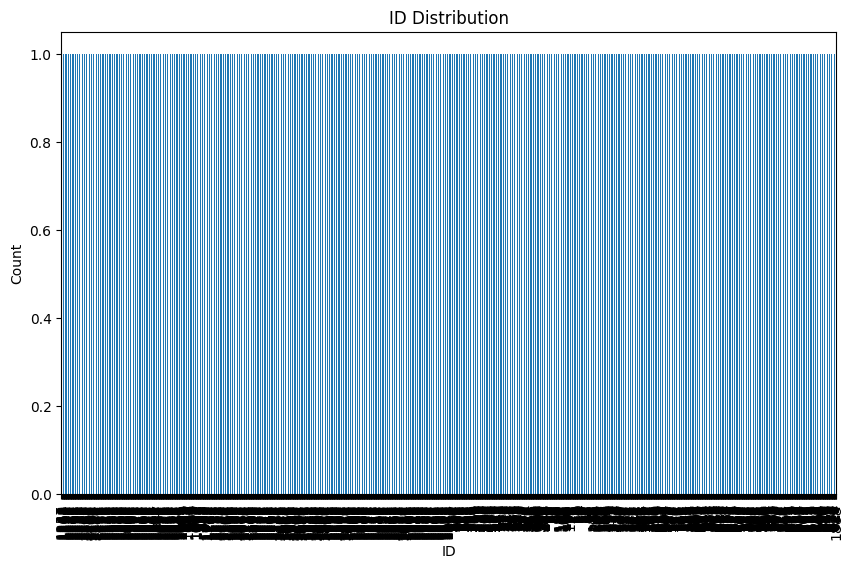

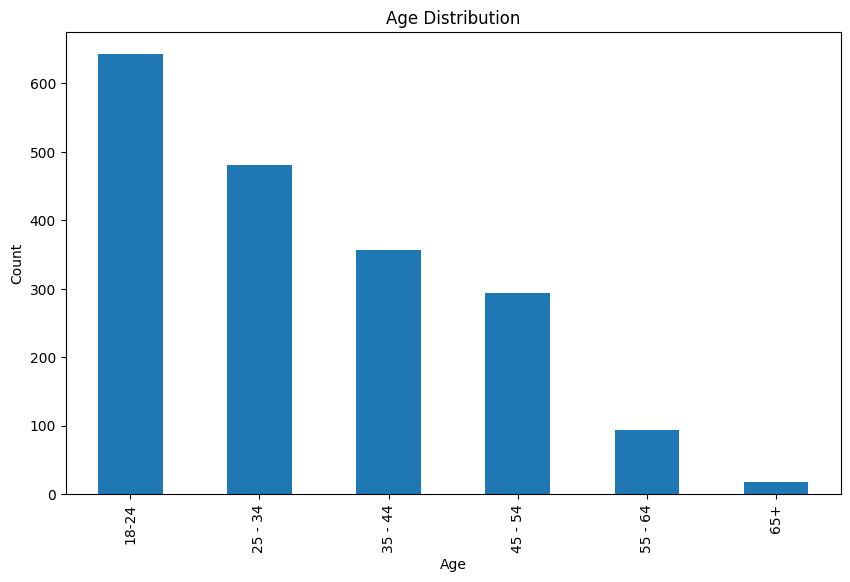

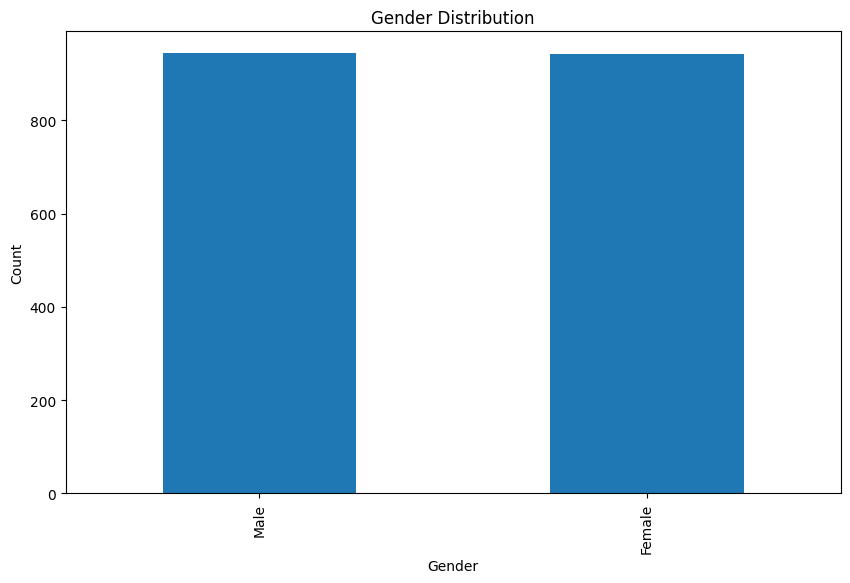

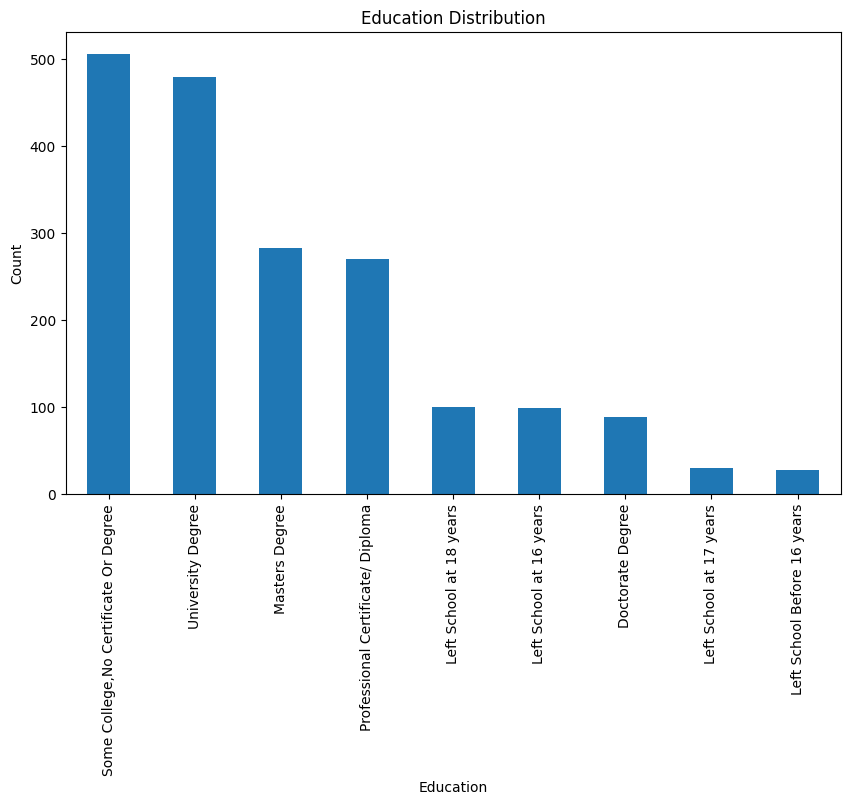

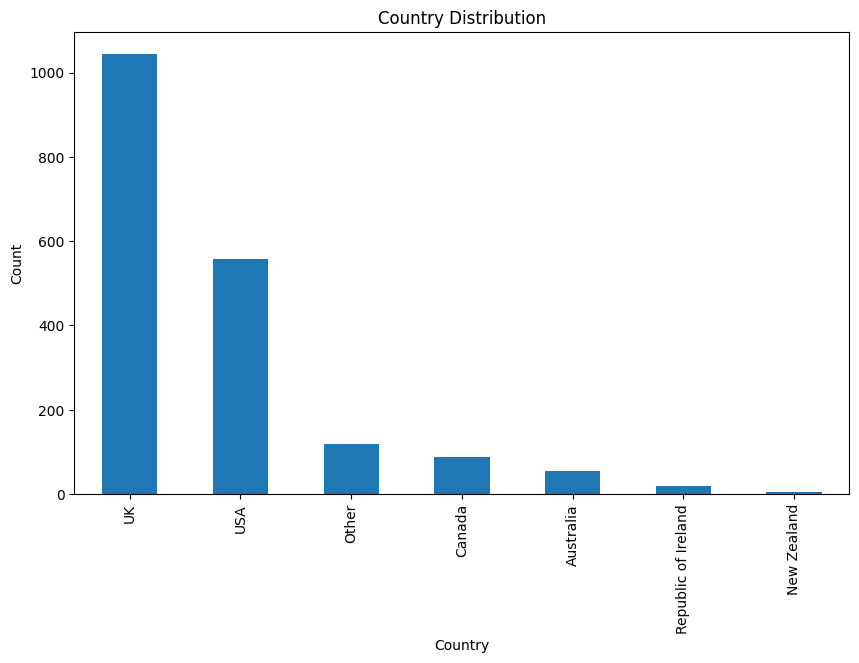

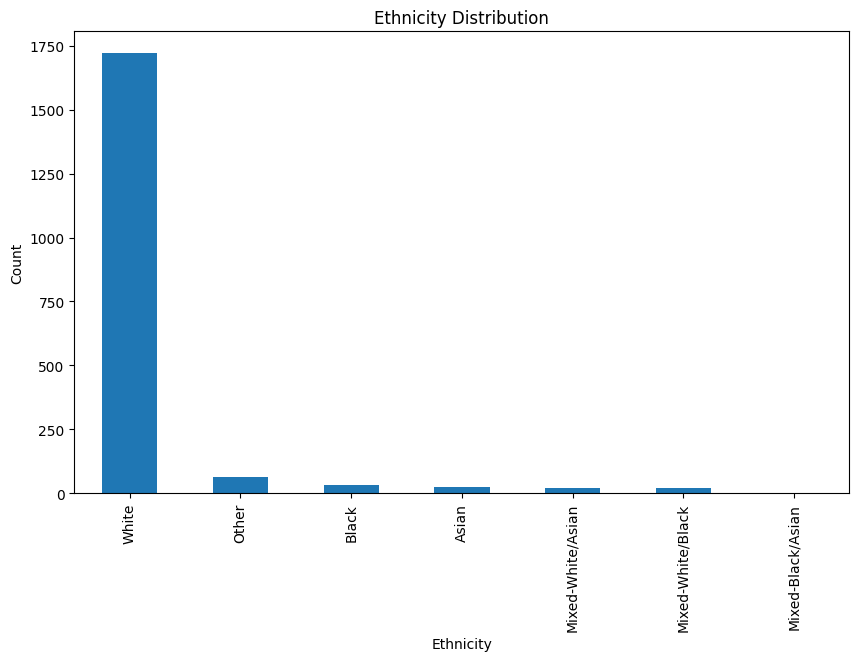

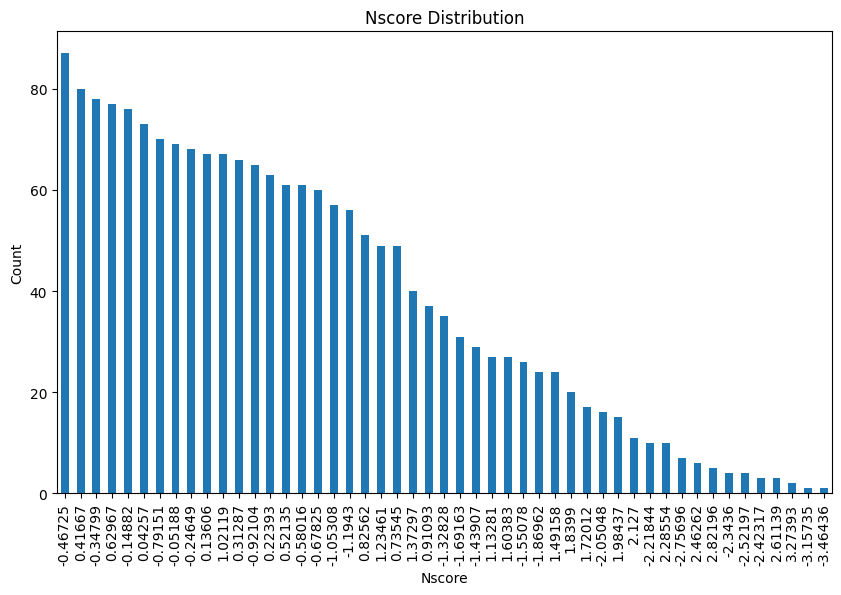

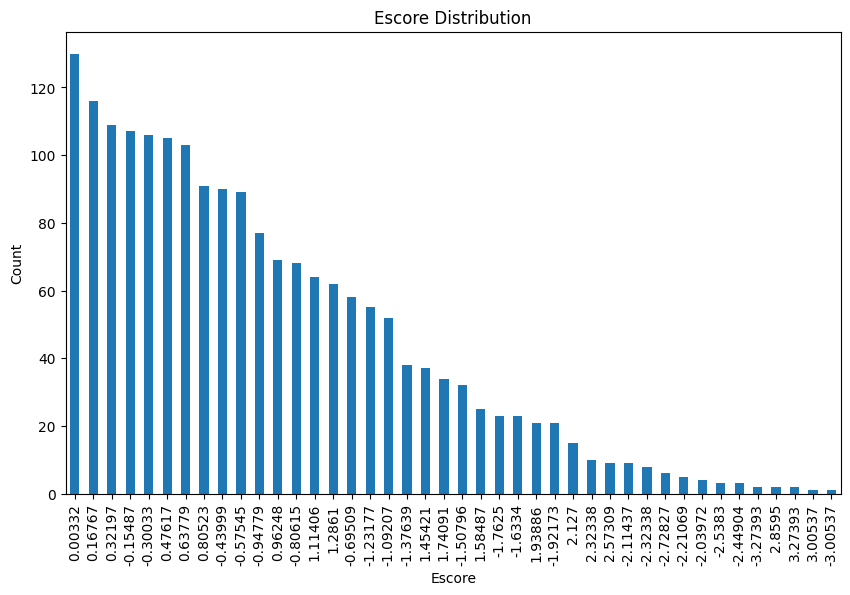

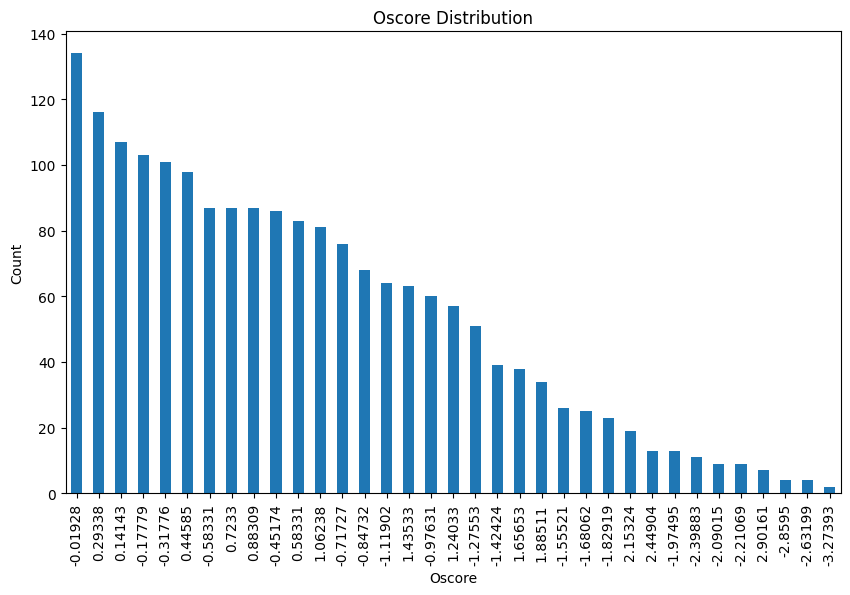

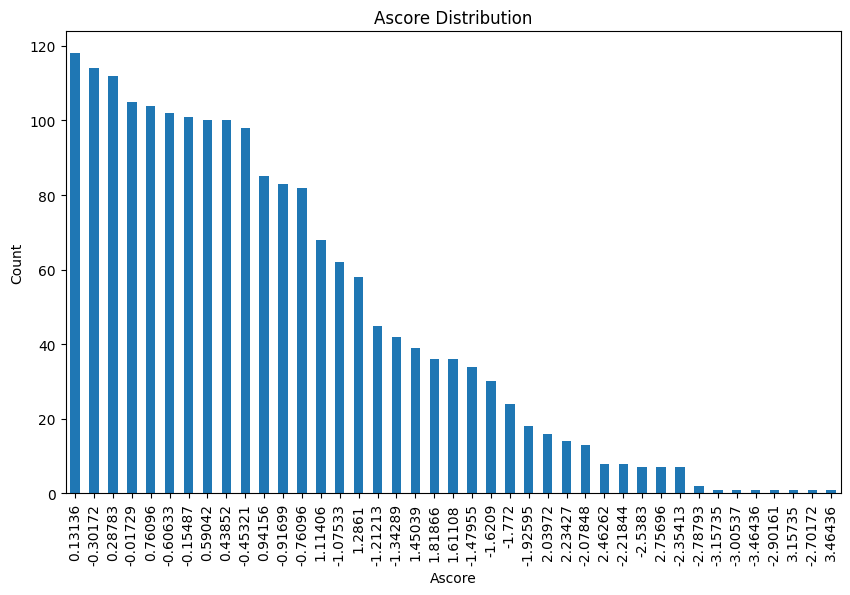

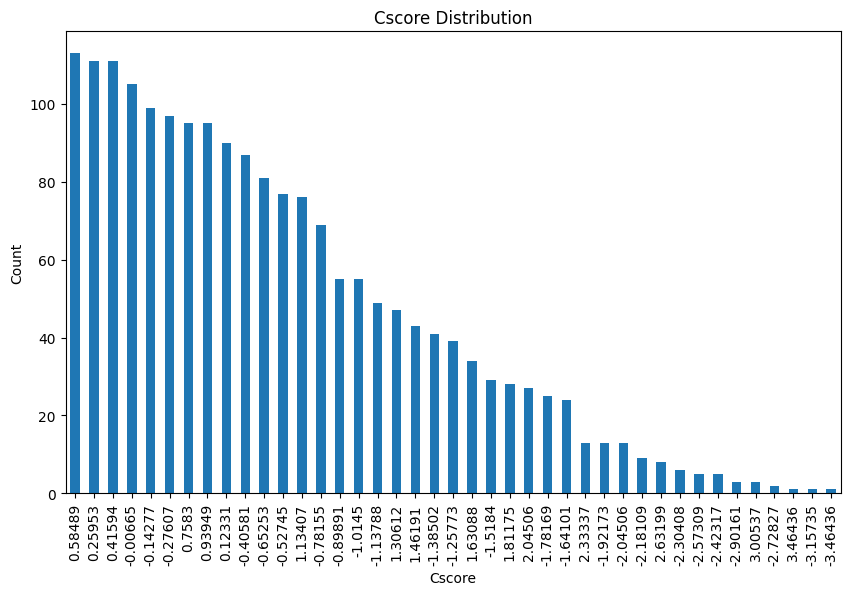

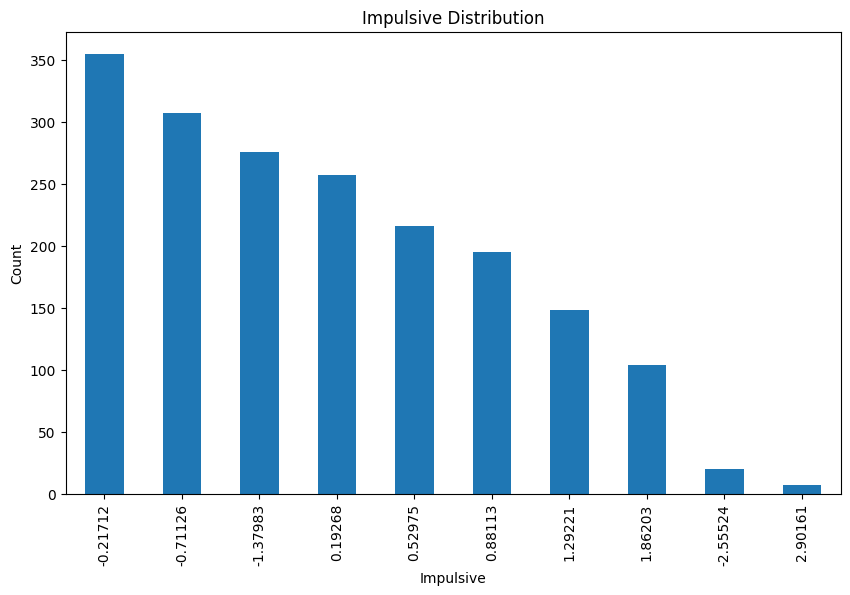

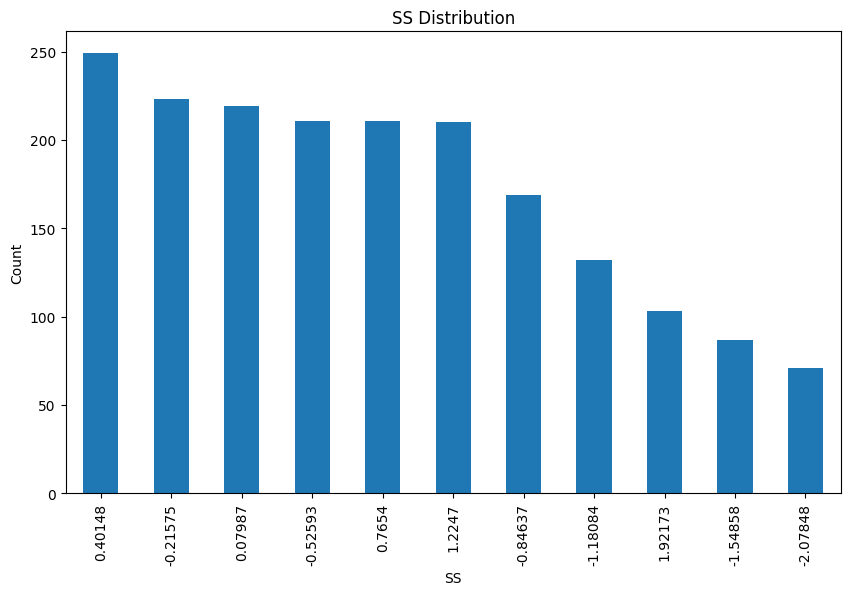

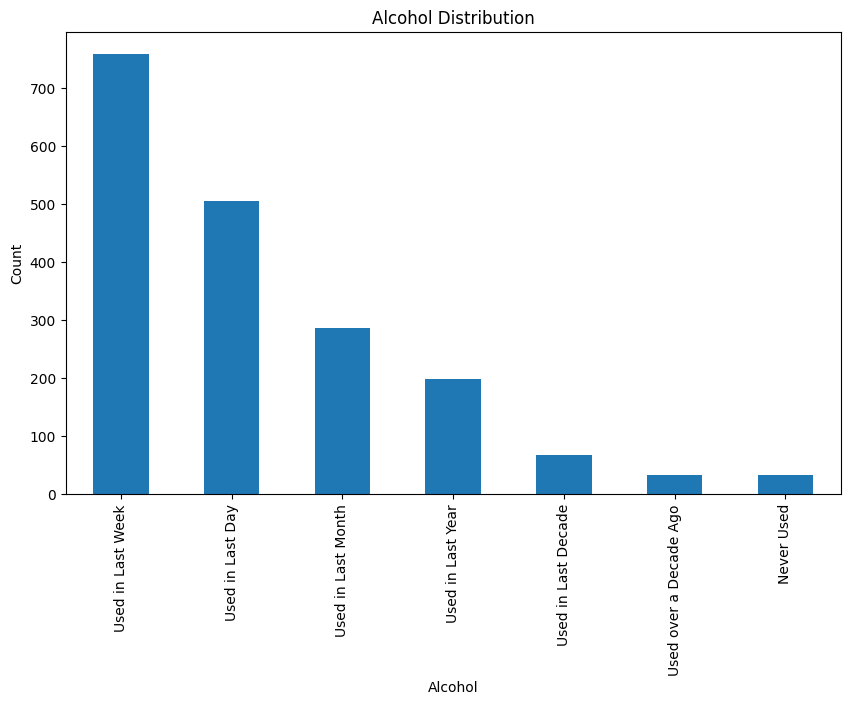

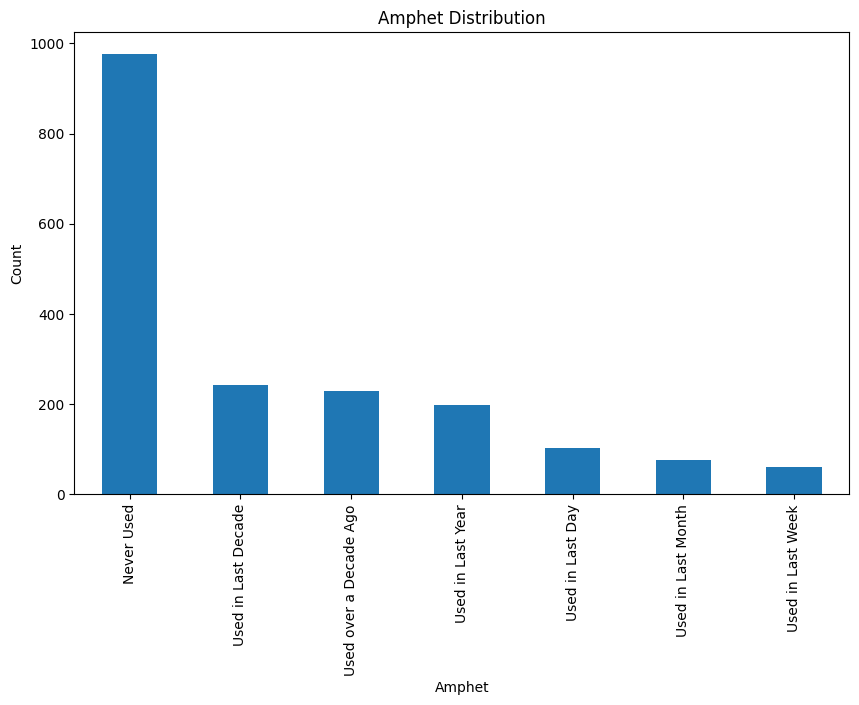

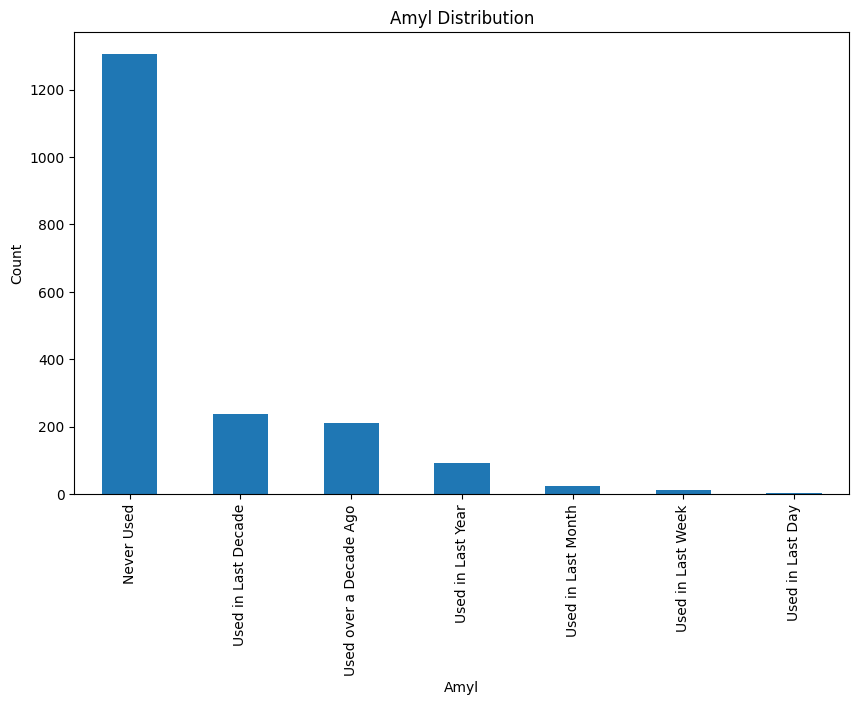

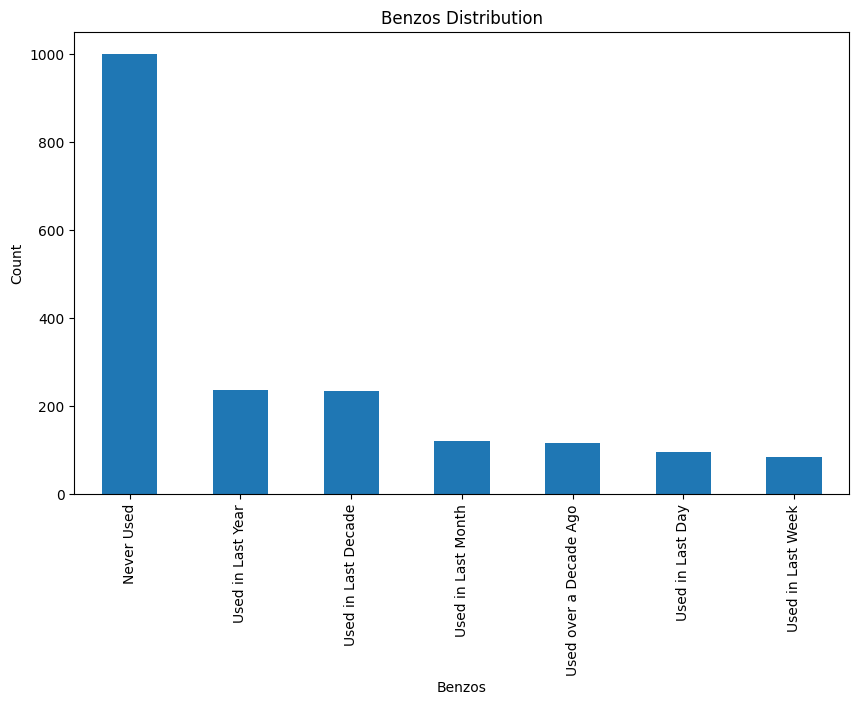

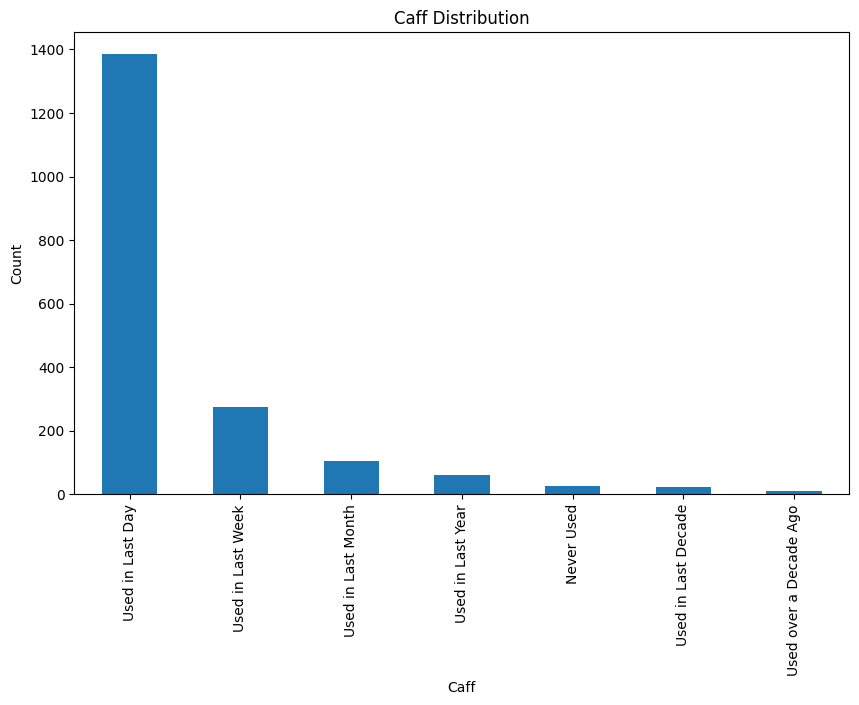

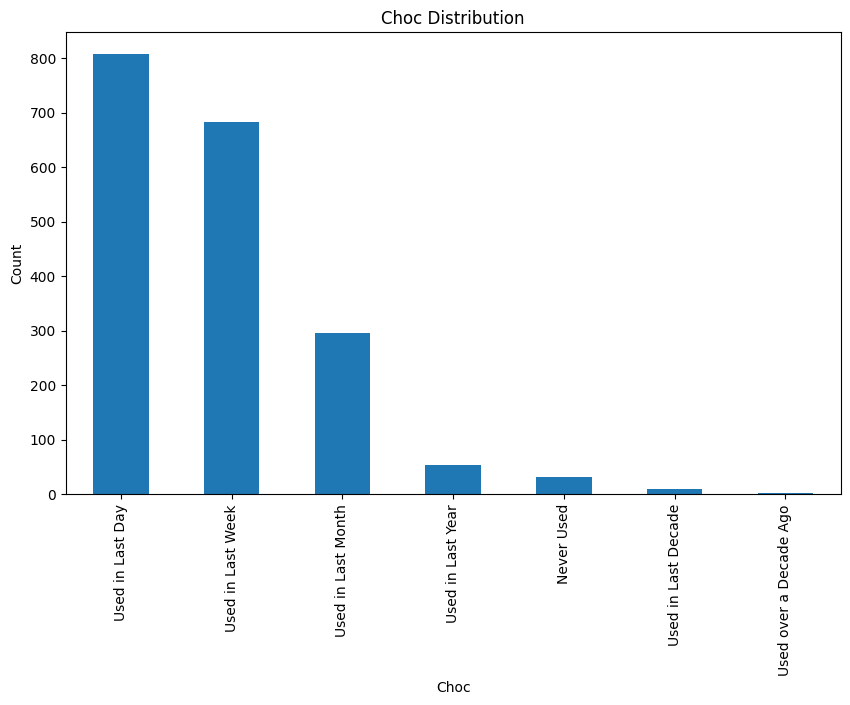

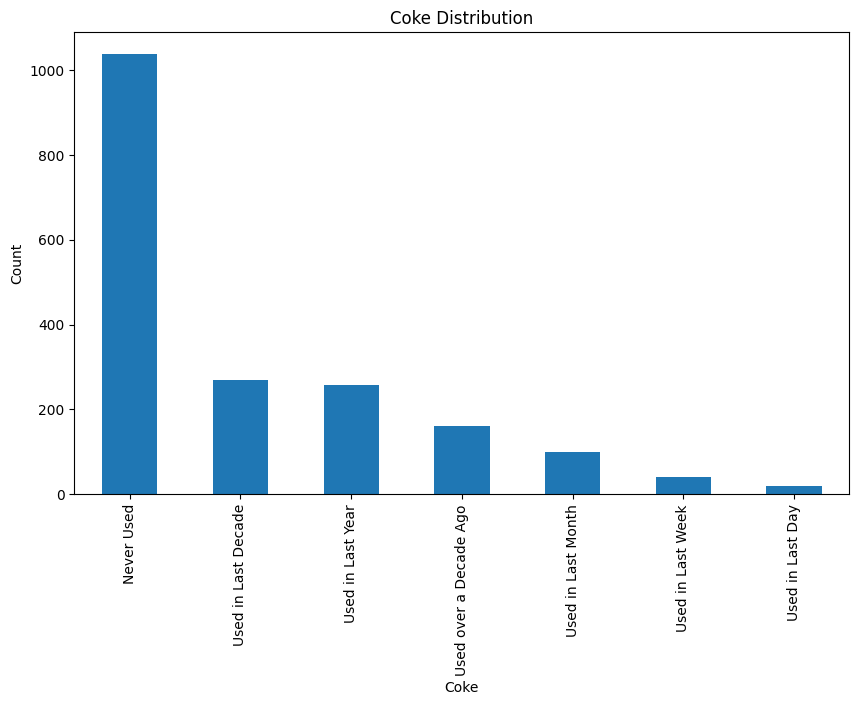

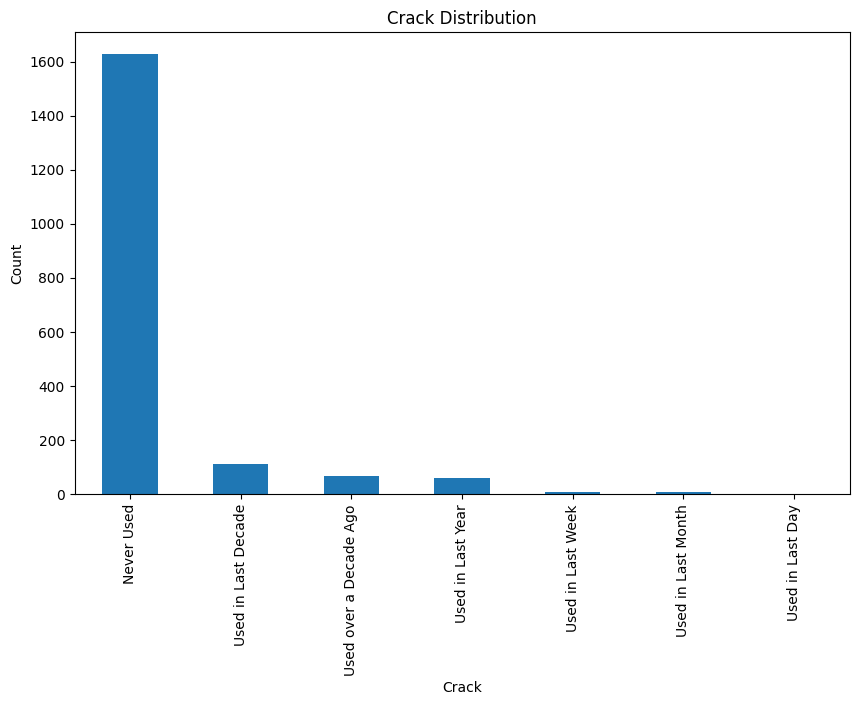

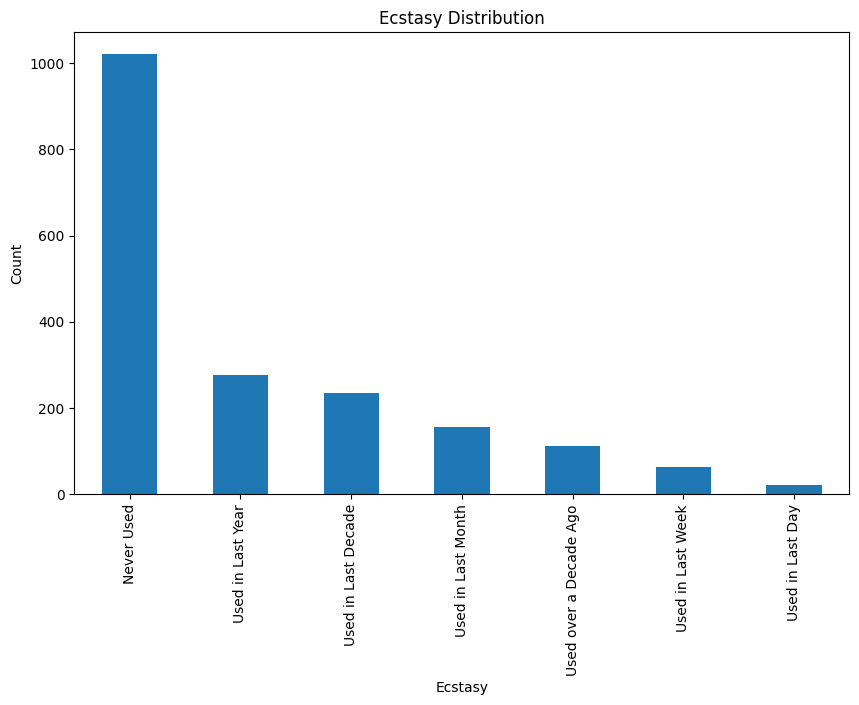

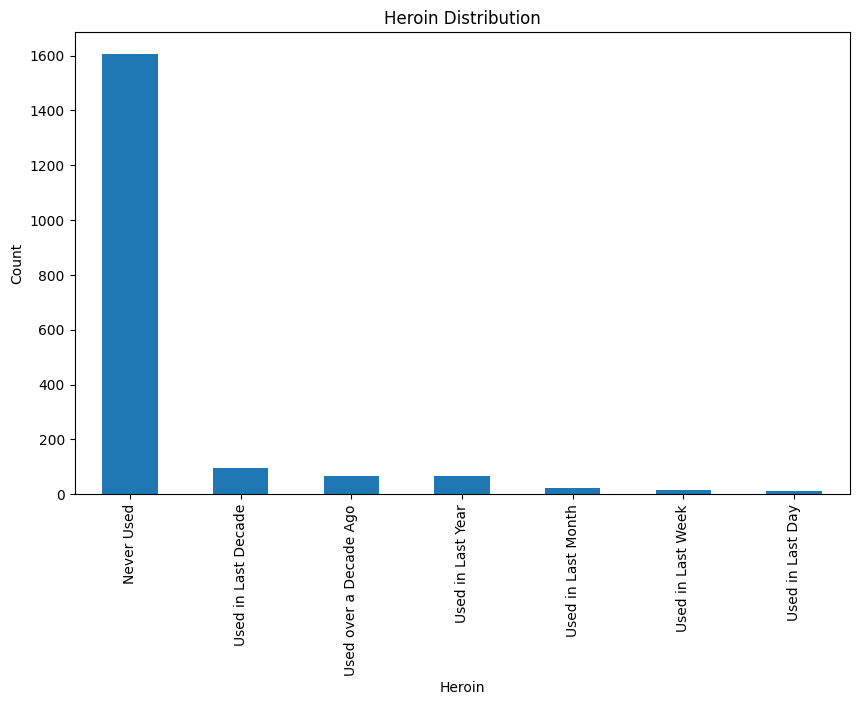

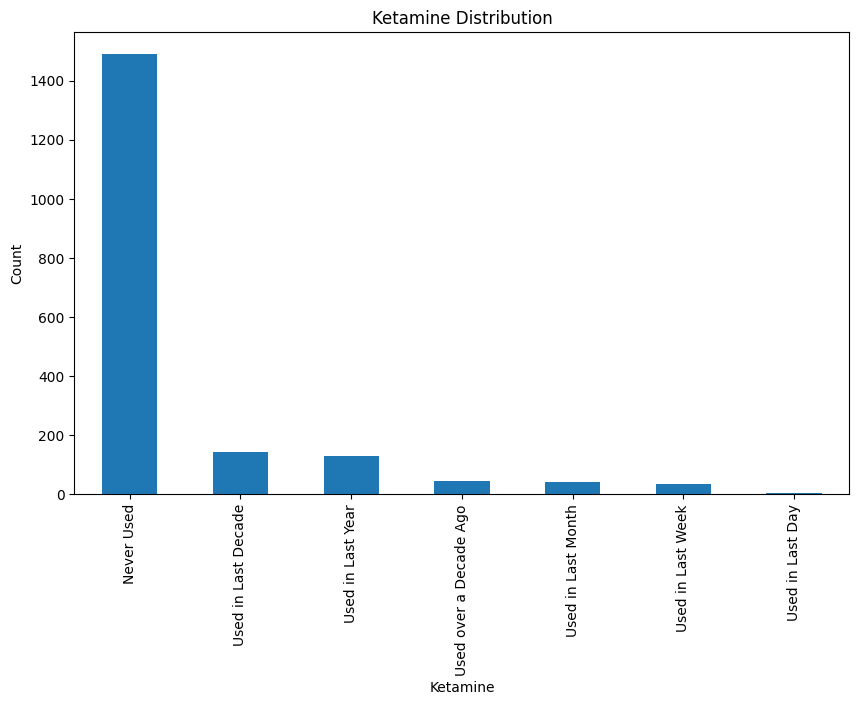

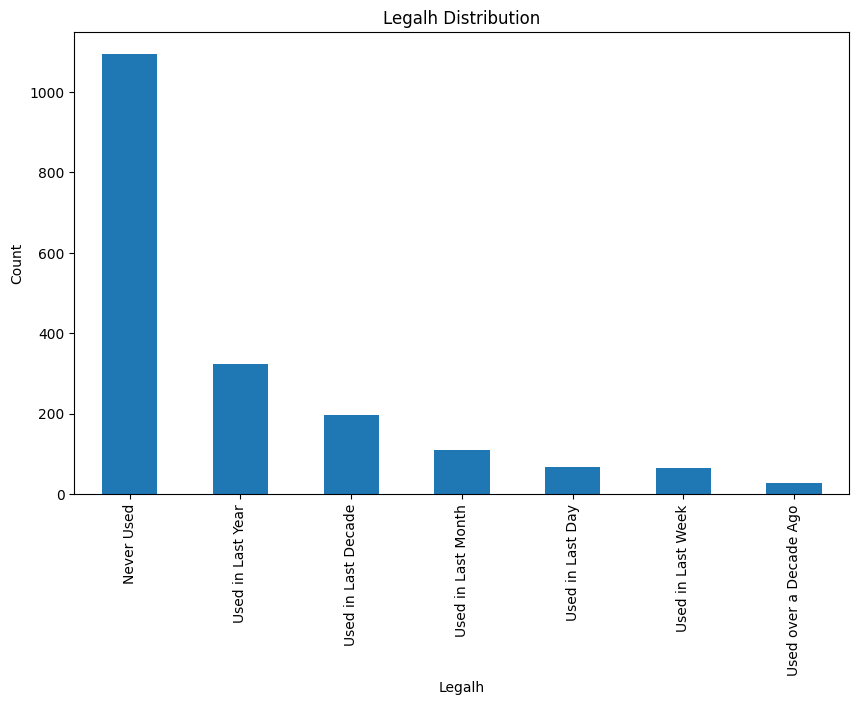

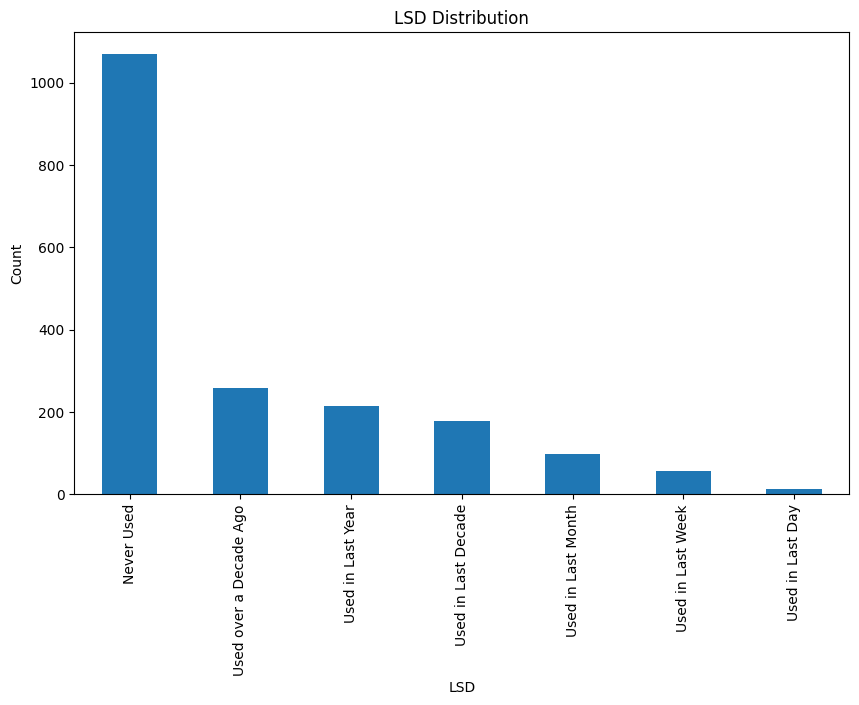

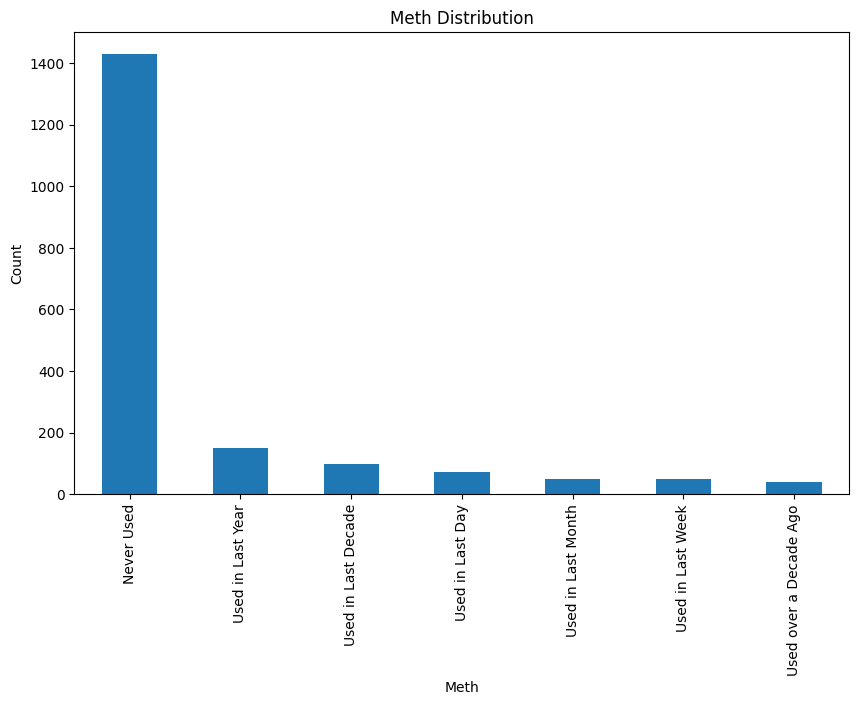

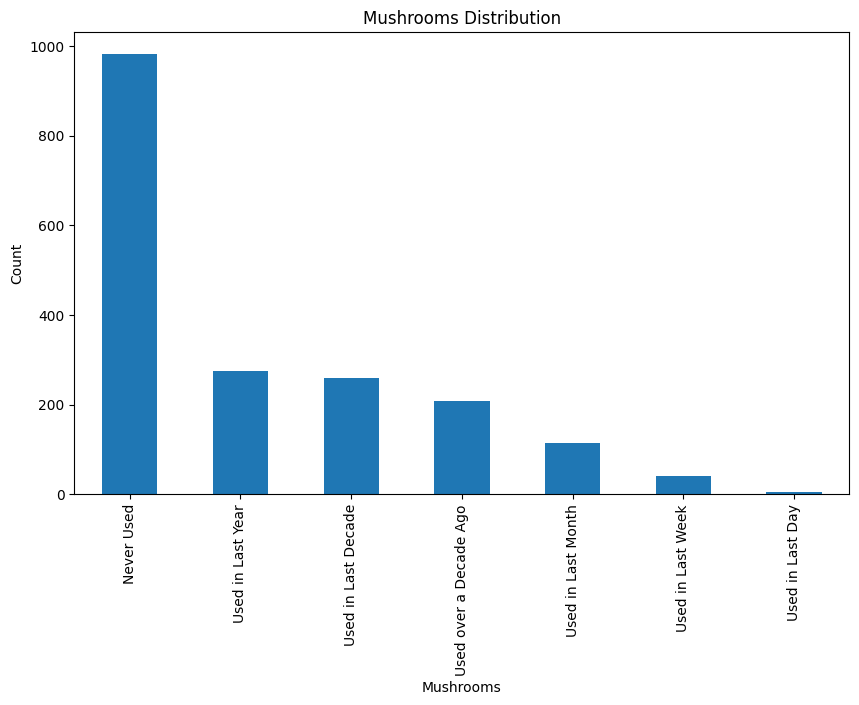

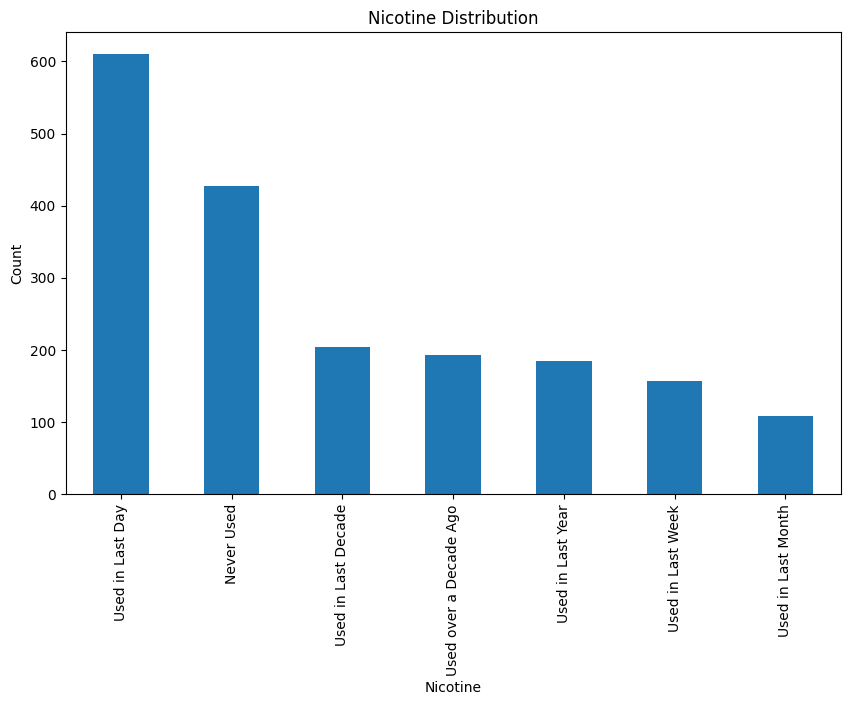

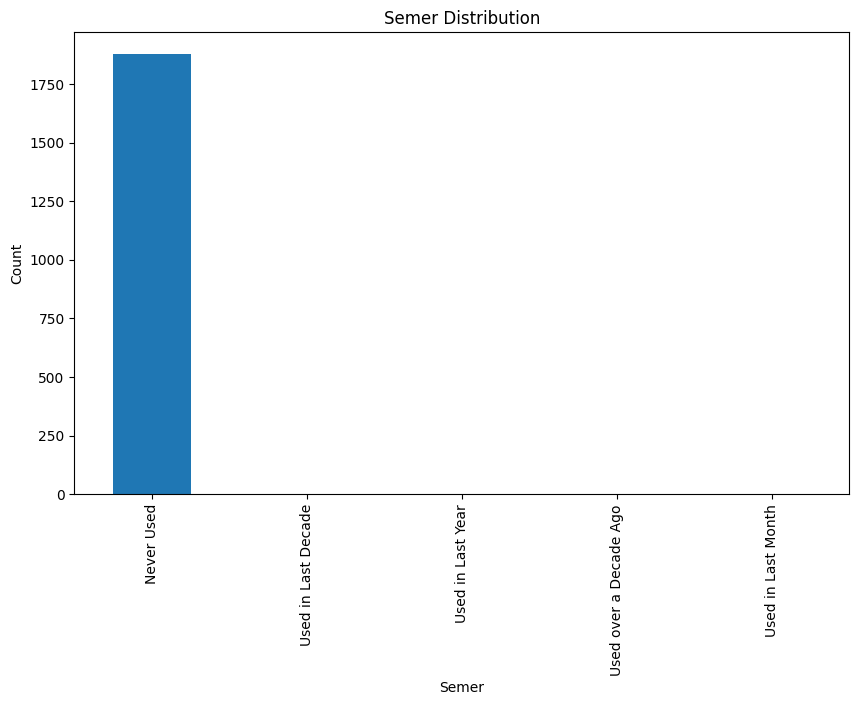

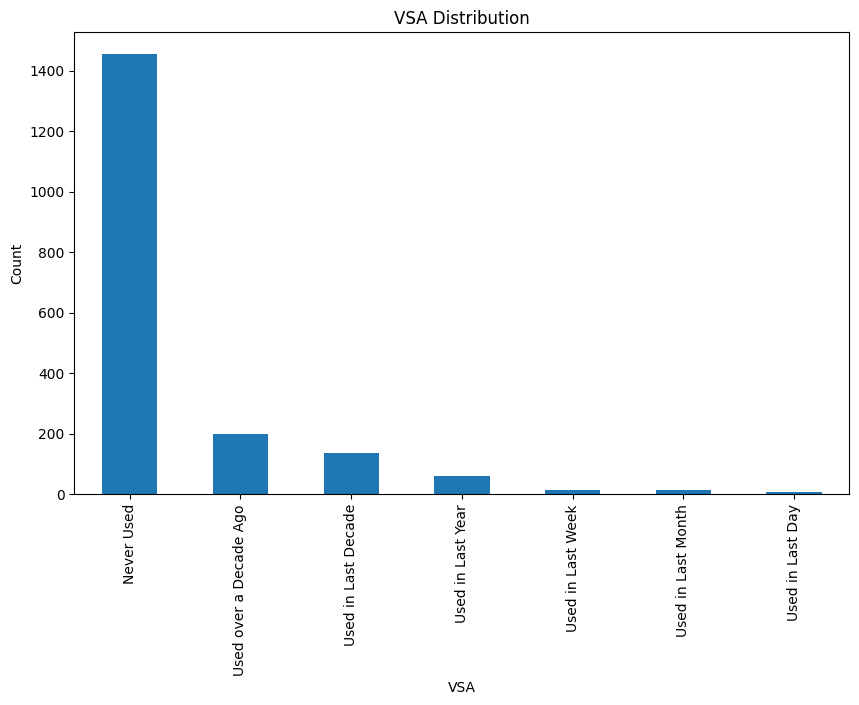

In [6]:
# draw bar plots that count the number of rows for each unique value in each column
for col in dataset.columns:
    if col not in ['Cannabis']:
        plt.figure(figsize=(10, 6))
        dataset[col].value_counts().plot(kind='bar')
        plt.title(f'{col} Distribution')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.show()

    


In [7]:
# # create new datasets for each unique value in the 'Cannabis' column

# cannabis_datasets = []
# prediction_columns = ['Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS']

# for value in dataset['Cannabis'].unique():
#     # filter the dataset to only include columns in the 'prediction_columns' list
#     cannabis_dataset = dataset[dataset['Cannabis'] == value][prediction_columns]
#     cannabis_datasets.append(cannabis_dataset)

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split

In [9]:
# apply random forest classifier to the dataset
def apply_random_forest_classifier(dataset, target_column):
    # split the dataset into a training set and a test set
    X = dataset.drop(target_column, axis=1)
    y = dataset[target_column]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # create a random forest classifier
    clf = RandomForestClassifier(n_estimators=100, random_state=42)

    # train the classifier
    clf.fit(X_train, y_train)

    # make predictions
    y_pred = clf.predict(X_test)

    # calculate the accuracy of the classifier
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy}')

    # calculate the precision of the classifier
    precision = precision_score(y_test, y_pred, average='weighted')
    print(f'Precision: {precision}')

    # calculate the recall of the classifier
    recall = recall_score(y_test, y_pred, average='weighted')
    print(f'Recall: {recall}')

    # calculate the confusion matrix of the classifier
    cm = confusion_matrix(y_test, y_pred)
    print(f'Confusion Matrix: {cm}')

    # plot the confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
    disp.plot()

    return clf

In [20]:
# replace the CL0, CL1, CL2, CL3, CL4, CL5, CL6 values in the 'Cannabis' column with 0, 1, 2, 3, 4, 5, 6
cannabis_col = {
    'CL0': 0,
    'CL1': 1,
    'CL2': 2,
    'CL3': 3,
    'CL4': 4,
    'CL5': 5,
    'CL6': 6,
}

data1 = data1.replace(cannabis_col)

Accuracy: 0.5039787798408488
Precision: 0.4353751368784323
Recall: 0.5039787798408488
Confusion Matrix: [[73  7  4  0  0  0  2]
 [11 11  5  0  0  0  1]
 [15  7 22  1  0  0 10]
 [ 1  8 12  3  2  3 28]
 [ 1  0  5  1  0  1 19]
 [ 0  0  2  0  0  2 28]
 [ 2  1  3  3  0  4 79]]


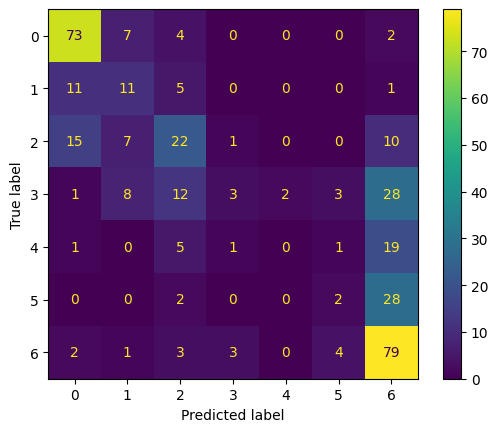

In [21]:
# call the function with the dataset and the target column as 'Cannabis'
clf = apply_random_forest_classifier(data1, 'Cannabis')